# Assignment 2
## Regression, Probability Theory, and Optimization

In [5]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import pylab
%matplotlib inline
from sklearn.cross_validation import train_test_split
import random as rd
import matplotlib.pyplot as plt


### 1. Linear Regression
1.1. Load the House sales dataset from the houses.csv file and place them in a data-frame df. (Hint: You can use pandas.read_csv function. New in pandas? Click here ). Then generate and show various statistic summary using pandas.DataFrame.describe method. What is pandas dataframe? Using pandas.DataFrame methods split the dataset into target value Y (price) and feature matrix X (all feature columns). In addition, extract the sqft_living column into a feature vector name X_1.

pandas.DataFrame is a two dimensional datastructure. It resembles the table object in SQL. It has rows and columns. 

In [2]:
df = pd.read_csv('houses.csv')
print(df.describe(include = 'all'))

X = np.array(df[df.columns[1:16]].values, dtype = 'int')
X_1 = np.array(df[['sqft_living']].values)
y = np.array(df[['price (grands)']].values, dtype = 'int')

       price (grands)      bedrooms     bathrooms   sqft_living      sqft_lot  \
count    21613.000000  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean       540.088142      3.370842      2.114757   2079.899736  1.510697e+04   
std        367.127196      0.930062      0.770163    918.440897  4.142051e+04   
min         75.000000      0.000000      0.000000    290.000000  5.200000e+02   
25%        321.950000      3.000000      1.750000   1427.000000  5.040000e+03   
50%        450.000000      3.000000      2.250000   1910.000000  7.618000e+03   
75%        645.000000      4.000000      2.500000   2550.000000  1.068800e+04   
max       7700.000000     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517

1.2. Write a function named linear_regression to implement Linear Regression without using public libraries related to regression. The inputs of this function should be predictor values (X or X_1), a target value (Y), a learning rate (lr), and the number of iterations (repetition). The function must build a linear model using gradient descent and output the model (params) and loss values per iteration (loss). Set the iteration to 10000 and calculate and show the mean squared error (MSE) for the models obtained from both X and X_1 predictors (hint: you might write another function named predict to predict the values based on X or X_1 and params) and plot the learning curve (loss) for both models in one figure (hint: use log scaling plot). Try different learning rates and show the results.

In [3]:
def linear_regression(X, price, lr = 0.00000000001, repetition = 10):
    tot_cols = len(X[1, :])
    tot_rows = len(price)
    w0 = np.array([[1]]).T
    w = np.array([[1 for i in range(tot_cols)]]).reshape(tot_cols,1)
    loss = np.array([])
    for no_iteration in range(repetition - 1):
        y = np.dot(X, w[:, -1].reshape(tot_cols, 1))+ w0[-1]
        w = np.concatenate((w, w[:, -1].reshape(tot_cols, 1) - (lr*sum(np.dot((y - price).reshape(1, tot_rows), X)) / tot_rows).reshape(tot_cols,1)), axis = 1)
        w0 = np.append(w0, w0[-1] - (lr*sum((y - price)) / tot_rows))
        loss = np.append(loss, sum((y - price)**2) / (2*tot_rows))
    
    return (w0, w, loss, y)

In [4]:
def predict(w0, w, test_x):
    tot_cols = len(test_x[1, :])
    y_pred = np.dot(test_x, w[:, -1].reshape(tot_cols, 1)) + w0[-1]
    return (y_pred)

Different learning rates:-

For learning rate: 0.00000000001

Mean Squared Error for all features - X
13932764.2541
Mean Squared Error for all features - X_1 (sqft_living)
2606069.77352


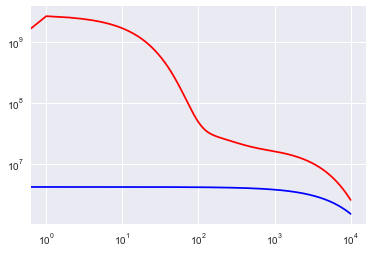

In [22]:
# Regression for all features -> X


w0_X, w_X, loss_X, y_X = linear_regression(X, y, 0.00000000001, 10000)
pylab.loglog(loss_X, 'r')
print("Mean Squared Error for all features - X")
print(np.mean(loss_X))

# Regression for all features -> X_1

w0_X_1, w_X_1, loss_X_1, y_X_1 = linear_regression(X_1, y, 0.00000000001, 10000)
pylab.loglog(loss_X_1, 'b')
print("Mean Squared Error for all features - X_1 (sqft_living)")
print(np.mean(loss_X_1))
pylab.show()
#y_predicted = predict(w0_X_1, w_X_1, test_x_1)

 For learning rate: 0.000000000001

Mean Squared Error for all features - X
73388682.482
Mean Squared Error for all features - X_1 (sqft_living)
3954199.61963


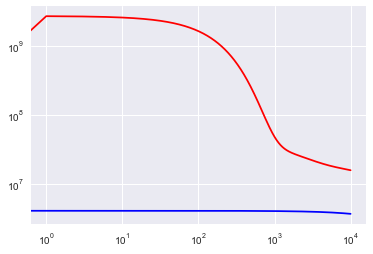

In [24]:
w0_X, w_X, loss_X, y_X = linear_regression(X, y, 0.000000000001, 10000)
pylab.loglog(loss_X, 'r')
print("Mean Squared Error for all features - X")
print(np.mean(loss_X))

w0_X_1, w_X_1, loss_X_1, y_X_1 = linear_regression(X_1, y, 0.000000000001, 10000)
pylab.loglog(loss_X_1, 'b')
print("Mean Squared Error for all features - X_1 (sqft_living)")
print(np.mean(loss_X_1))
pylab.show()

For learning rate : 0.0000000000001

In [ ]:
w0_X, w_X, loss_X, y_X = linear_regression(X, y, 0.0000000000001, 10000)
pylab.loglog(loss_X, 'r')
print("Mean Squared Error for all features - X")
print(np.mean(loss_X))

w0_X_1, w_X_1, loss_X_1, y_X_1 = linear_regression_m(X_1, y, 0.0000000000001, 10000)
pylab.loglog(loss_X_1, 'b')
print("Mean Squared Error for all features - X_1 (sqft_living)")
print(np.mean(loss_X_1))
pylab.show()

For learning rate : 0.0000000000000001

In [ ]:
w0_X, w_X, loss_X, y_X = linear_regression(X, y, 0.0000000000000001, 10000)
pylab.loglog(loss_X, 'r')
print("Mean Squared Error for all features - X")
print(np.mean(loss_X))

w0_X_1, w_X_1, loss_X_1, y_X_1 = linear_regression_m(X_1, y, 0.0000000000000001, 10000)
pylab.loglog(loss_X_1, 'b')
print("Mean Squared Error for all features - X_1 (sqft_living)")
print(np.mean(loss_X_1))
pylab.show()

1.3. Visualize the best-obtained model for X_1 using a scatter plot to show price vs area and plot the linear model. Then, visualize the best-obtained model for all features (X) using a scatter plot to show the predicted vs actual target values.

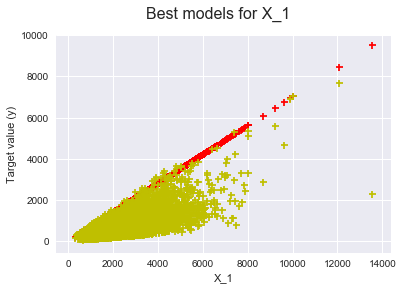

In [22]:
w0_X_1, w_X_1, loss_X_1, y_X_1 = linear_regression(X_1, y, 0.00000000001, 10000)
plt.scatter(X_1,predict(w0_X_1, w_X_1, X_1), marker = "+", color = 'r')
plt.scatter(X_1,y, marker = "+", color = 'y')
plt.suptitle('Best models for X_1', fontsize=16)
plt.xlabel('X_1')
plt.ylabel('Target value (y)')
plt.show()

red colored (+) are for predicted X_1 and yellow colored (+) are for target (y)

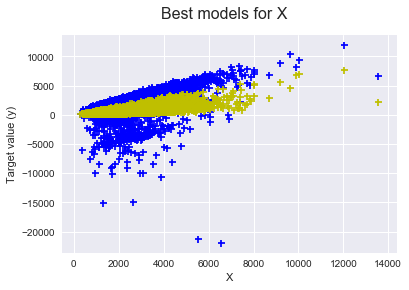

In [27]:
w0_X, w_X, loss_X, y_X = linear_regression(X, y, 0.00000000001, 10000)
plt.scatter(X_1,predict(w0_X, w_X, X), marker = "+", color = 'b')
plt.scatter(X_1,y, marker = "+", color = 'y')
plt.suptitle('Best models for X', fontsize=16)
plt.xlabel('X')
plt.ylabel('Target value (y)')
plt.show()

blue colored (+) are for predicted X and yellow colored (+) are for target (y)

** Below graphs are just for information:- **

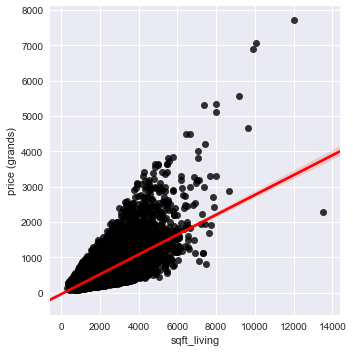

In [18]:
sns.lmplot(x="sqft_living", y="price (grands)", data=df, scatter_kws={"color": "black"}, line_kws={"color": "red"})

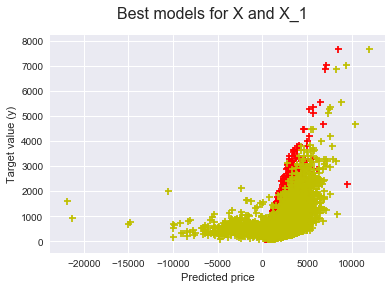

In [10]:
w0_X_1, w_X_1, loss_X_1, y_X_1 = linear_regression(X_1, y, 0.00000000001, 10000)
w0_X, w_X, loss_X, y_X = linear_regression(X, y, 0.00000000001, 10000)
plt.scatter(predict(w0_X_1, w_X_1, X_1),y, marker = "+", color = 'r')
plt.scatter(predict(w0_X, w_X, X),y, marker = "+", color = 'y')
plt.suptitle('Best models for X and X_1', fontsize=16)
plt.xlabel('Predicted price')
plt.ylabel('Target value (y)')
plt.show()

In the above graph, yellow colored "+" is from the model with all the features (X) while red colored "+" is from the model with single feature (X_1).

1.4. Modify the linear_regression function in a way that applies Ridge regression, and name them linear_regression_Ridge. Then repeat 1.2 & 1.3. You can thereby use a fixed learning rate that you find appropriate, but you should try and plot different values for the regularization penalty alpha.

Below is the modified linear regression function which uses Ridge regression. We have added the product of regularization penalty and the sum of square of all the weights to the loss term. This helps to penalize the values which have more error.

Note: Instead of alpha, I have take it as lambdaa.

In [12]:
def linear_regression_Ridge(X, price, lr = 0.00000000001, repetition = 10, lambdaa = 0.5):
    tot_cols = len(X[1, :])
    tot_rows = len(price)
    w0 = np.array([[-1]]).T
    w = np.array([[-1 for i in range(tot_cols)]]).reshape(tot_cols,1)
    loss = np.array([])
    for no_iteration in range(repetition - 1):
        y = np.dot(X, w[:, -1].reshape(tot_cols, 1))+ w0[-1]
        w = np.concatenate((w, w[:, -1].reshape(tot_cols, 1) - (lr*sum(np.dot((y - price).reshape(1, tot_rows), X)) / tot_rows).reshape(tot_cols,1)), axis = 1)
        w0 = np.append(w0, w0[-1] - (lr*sum((y - price)) / tot_rows))
        loss = np.append(loss, (sum((y - price)**2) / (2*tot_rows)) + (lambdaa * (sum(w[:, -1]**2) + (w0[-1]**2))))
    
    return (w0, w, loss, y)

For learning rate : 0.000000000001 and lambdaa = 0.5

Mean Squared Error for all features - X
73388689.2453
Mean Squared Error for all features - X_1 (sqft_living)
3954200.5882


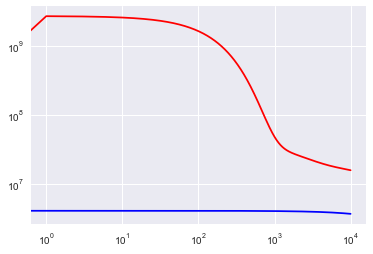

In [9]:
w0_X, w_X, loss_X, y_X = linear_regression_Ridge(X, y, 0.000000000001, 10000, lambdaa = 0.5)
pylab.loglog(loss_X, 'r')
print("Mean Squared Error for all features - X")
print(np.mean(loss_X))

w0_X_1, w_X_1, loss_X_1, y_X_1 = linear_regression_Ridge(X_1, y, 0.000000000001, 10000, lambdaa = 0.5)
pylab.loglog(loss_X_1, 'b')
print("Mean Squared Error for all features - X_1 (sqft_living)")
print(np.mean(loss_X_1))
pylab.show()

For learning rate : 0.0000000001 and lambda = 0.1

Mean Squared Error for all features - X
1663852.78499
Mean Squared Error for all features - X_1 (sqft_living)
433530.455437


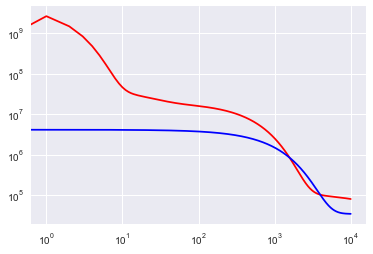

In [10]:
w0_X, w_X, loss_X, y_X = linear_regression_Ridge(X, y, 0.0000000001, 10000, lambdaa = 0.1)
pylab.loglog(loss_X, 'r')
print("Mean Squared Error for all features - X")
print(np.mean(loss_X))

w0_X_1, w_X_1, loss_X_1, y_X_1 = linear_regression_Ridge(X_1, y, 0.0000000001, 10000, lambdaa = 0.1)
pylab.loglog(loss_X_1, 'b')
print("Mean Squared Error for all features - X_1 (sqft_living)")
print(np.mean(loss_X_1))
pylab.show()

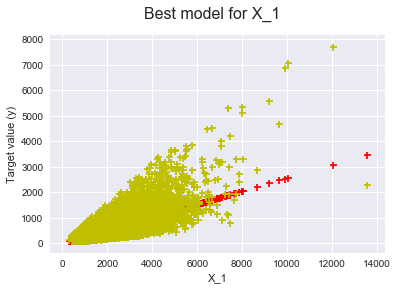

In [24]:
w0_X_1, w_X_1, loss_X_1, y_X_1 = linear_regression_Ridge(X_1, y, 0.0000000001, 10000, lambdaa = 0.1)
plt.scatter(X_1,predict(w0_X_1, w_X_1, X_1), marker = "+", color = 'r')
plt.scatter(X_1,y, marker = "+", color = 'y')
plt.suptitle('Best model for X_1', fontsize=16)
plt.xlabel('X_1')
plt.ylabel('Target value (y)')
plt.show()

red colored (+) are for predicted X_1 and yellow colored (+) are for target (y)

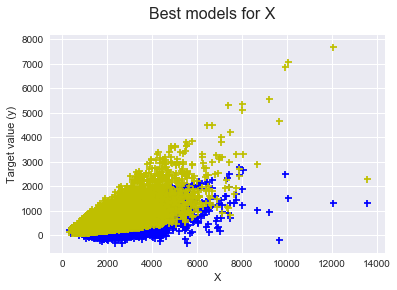

In [26]:
w0_X, w_X, loss_X, y_X = linear_regression_Ridge(X, y, 0.0000000001, 10000, lambdaa = 0.1)
plt.scatter(X_1,predict(w0_X, w_X, X), marker = "+", color = 'b')
plt.scatter(X_1,y, marker = "+", color = 'y')
plt.suptitle('Best models for X', fontsize=16)
plt.xlabel('X')
plt.ylabel('Target value (y)')
plt.show()

blue colored (+) are for predicted X and yellow colored (+) are for target (y)

Below mentioned graph is just for the information:-

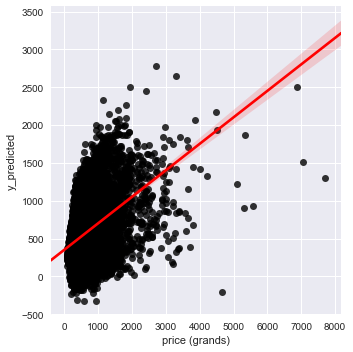

In [11]:
w0_X, w_X, loss_X, y_X = linear_regression_Ridge(X, y, 0.0000000001, 10000, lambdaa = 0.1)
y_predicted  = predict(w0_X, w_X, X)
df_reg = pd.DataFrame({'y_predicted':y_predicted[:,0]})
df_reg['price (grands)'] = df[['price (grands)']]
sns.lmplot(x = 'price (grands)', y = 'y_predicted', data  = df_reg, scatter_kws={"color": "black"}, line_kws={"color": "red"})

1.5.	Use linear_regression_Ridge and write a function named linear_regression_Ridge_momentum in which you add a momentum term. Try different momenta and plot the learning curves with and without momentum for a fixed learning rate.

we have modified linear_regression_Ridge() function and added momentum term to it.

In [12]:
def linear_regression_Ridge_momentum(X, price, lr = 0.0000000001, repetition = 10, momenta = 0.9, lambdaa = 0.1):
    
    tot_cols = len(X[1, :])
    tot_rows = len(price)
    w0 = np.array([[-1]]).T
    w = np.array([[-1 for i in range(tot_cols)]]).reshape(tot_cols,1)
    loss = np.array([])
    for no_iteration in range(repetition - 1):
        two_step_back = no_iteration - 2
        y = np.dot(X, w[:, -1].reshape(tot_cols, 1))+ w0[-1]
        w = np.concatenate((w, w[:, -1].reshape(tot_cols, 1) - 
                            ((lr*sum(np.dot((y - price).reshape(1, tot_rows), X)) / tot_rows) + 
                             (momenta*(w[:, -1] - w[:, no_iteration - 1]))).reshape(tot_cols,1)), axis = 1)
        w0 = np.append(w0, w0[-1] - (lr*sum((y - price)) / tot_rows))
        loss = np.append(loss, (sum((y - price)**2) / (2*tot_rows)) + lambdaa * (sum(w[:, -1]**2) + (w0[-1]**2)))
    
    return (w0, w, loss, y)

For momenta = 0.9

Mean Squared Error for all features - X
22520894.4516
Mean Squared Error for all features - X_1 (sqft_living)
3216468.40986


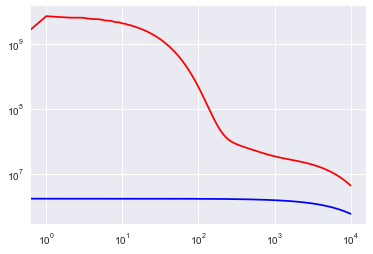

In [11]:
w0_X, w_X, loss_X, y_X = linear_regression_Ridge_momentum(X, y, 0.00000000001, 10000, momenta = 0.9, lambdaa = 0.1)
pylab.loglog(loss_X, 'r')
print("Mean Squared Error for all features - X")
print(np.mean(loss_X))

w0_X_1, w_X_1, loss_X_1, y_X_1 = linear_regression_Ridge_momentum(X_1, y, 0.00000000001, 10000, momenta = 0.9, lambdaa = 0.1)
pylab.loglog(loss_X_1, 'b')
print("Mean Squared Error for all features - X_1 (sqft_living)")
print(np.mean(loss_X_1))
pylab.show()

For momenta = 0.95

Mean Squared Error for all features - X
2899418.55165
Mean Squared Error for all features - X_1 (sqft_living)
769927.834291


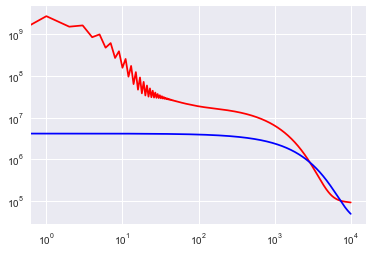

In [15]:
w0_X, w_X, loss_X, y_X = linear_regression_Ridge_momentum(X, y, 0.0000000001, 10000, momenta = 0.85, lambdaa = 0.1)
pylab.loglog(loss_X, 'r')
print("Mean Squared Error for all features - X")
print(np.mean(loss_X))

w0_X_1, w_X_1, loss_X_1, y_X_1 = linear_regression_Ridge_momentum(X_1, y, 0.0000000001, 10000, momenta = 0.85, lambdaa = 0.1)
pylab.loglog(loss_X_1, 'b')
print("Mean Squared Error for all features - X_1 (sqft_living)")
print(np.mean(loss_X_1))
pylab.show()

Without momentum:-

If we observe closely, the function linear_regression_Ridge_momentum() with momenta = 0 resembles to the function linear_regression_Ridge(). Though we have plotted the learning curve for it.

Mean Squared Error for all features - X
1663852.78499
Mean Squared Error for all features - X_1 (sqft_living)
433530.455437


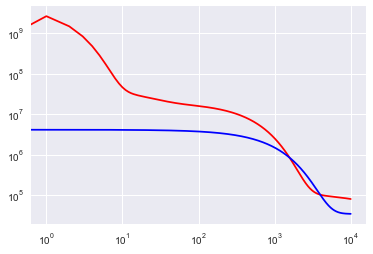

In [16]:
w0_X, w_X, loss_X, y_X = linear_regression_Ridge_momentum(X, y, 0.0000000001, 10000, momenta = 0, lambdaa = 0.1)
pylab.loglog(loss_X, 'r')
print("Mean Squared Error for all features - X")
print(np.mean(loss_X))

w0_X_1, w_X_1, loss_X_1, y_X_1 = linear_regression_Ridge_momentum(X_1, y, 0.0000000001, 10000, momenta = 0, lambdaa = 0.1)
pylab.loglog(loss_X_1, 'b')
print("Mean Squared Error for all features - X_1 (sqft_living)")
print(np.mean(loss_X_1))
pylab.show()

1.6.	Modify the linear_regression_Ridge_momentum function in a way that it fits the feature vector X_1 with a polynomial of order 2 and name it as polynomial_regression_optimized. Calculate the MSE, plot the learning curve and show the quadratic model on the scatter plot (price vs area).

In [15]:
def polynomial_regression_optimized(X, price, lr = 0.0001, repetition = 10, momenta = 0.9, lambdaa = 0.1):
    X = np.concatenate((X, X*X), axis = 1)
    tot_cols = len(X[1, :])
    tot_rows = len(price)
    w0 = np.array([[-1]]).T
    w = np.array([[-1 for i in range(tot_cols)]]).reshape(tot_cols,1)
    loss = np.array([])
    for no_iteration in range(repetition - 1):
        two_step_back = no_iteration - 2
        y = np.dot(X, w[:, -1].reshape(tot_cols, 1))+ w0[-1]
        w = np.concatenate((w, w[:, -1].reshape(tot_cols, 1) - 
                            ((lr*sum(np.dot((y - price).reshape(1, tot_rows), X)) / tot_rows) + (momenta*(w[:, -1] - w[:, no_iteration - 1]))).reshape(tot_cols,1)), axis = 1)
        w0 = np.append(w0, w0[-1] - (lr*sum((y - price)) / tot_rows))
        loss = np.append(loss, (sum((y - price)**2) / (2*tot_rows)) + lambdaa * (sum(w[:, -1]**2) + (w0[-1]**2)))
    
    return (w0, w, loss, y)

We have taken learning rate to be 0.0000000000000001 because we get overflow warning if we take less than that.

Mean Squared Error for all features - X_1 (sqft_living)
475419639271.0


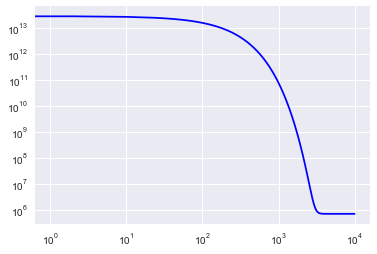

In [21]:
w0_X_1, w_X_1, loss_X_1, y_X_1 = polynomial_regression_optimized(X_1, y, 0.0000000000000001, 10000, momenta = 0.9, lambdaa = 0.1)
pylab.loglog(loss_X_1, 'b')
print("Mean Squared Error for all features - X_1 (sqft_living)")
print(np.mean(loss_X_1))
pylab.show()

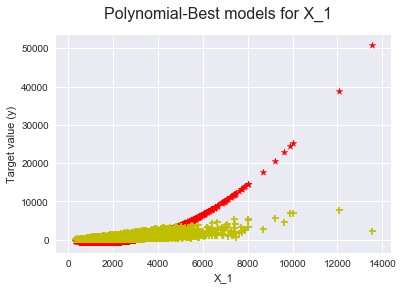

In [23]:
w0_X_1, w_X_1, loss_X_1, y_X_1 = polynomial_regression_optimized(X_1, y, 0.0000000000000001, 10000, momenta = 0.9, lambdaa = 0.1)
plt.scatter(X_1,predict(w0_X_1, w_X_1, np.concatenate((X_1, X_1*X_1), axis = 1)), marker = "*", color = 'r')
plt.scatter(X_1,y, marker = "+", color = 'y')
plt.suptitle('Polynomial-Best models for X_1', fontsize=16)
plt.xlabel('X_1')
plt.ylabel('Target value (y)')
plt.show()

red colored (+) are for predicted X_1(polynomial order two) and yellow colored (+) are for target (y)

below mentioned graph is just for the information:-

'\nplt.scatter(predict(w0_X_1, w_X_1, np.concatenate((X_1, X_1*X_1), axis = 1)),y, marker = "+", color = \'b\')\nplt.suptitle(\'Best models for X(*)\', fontsize=16)\nplt.xlabel(\'Predicted price\')\nplt.ylabel(\'Target value (y)\')\nplt.show()\n'

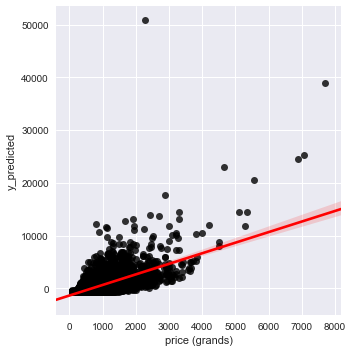

In [21]:
w0_X_1, w_X_1, loss_X_1, y_X_1 = polynomial_regression_optimized(X_1, y, 0.0000000000000001, 10000, momenta = 0.9, lambdaa = 0.1)
y_predicted  = predict(w0_X_1, w_X_1, np.concatenate((X_1, X_1*X_1), axis = 1))
df_reg = pd.DataFrame({'y_predicted':y_predicted[:,0]})
df_reg['price (grands)'] = df[['price (grands)']]
sns.lmplot(x = 'price (grands)', y = 'y_predicted', data  = df_reg, scatter_kws={"color": "black"}, line_kws={"color": "red"})

### 2. Working with random numbers:

2.1. Write a program that rolls two dice (randomly selects a number between 1 and 6 inclusive for each die). Repeat rolling dice 20 times. For each trial, you should add the two numbers that appear on each die and save it in a vector. Plot a histogram of the values you have gathered in the vector. Based on this histogram, what are the estimates for the probabilities of each number? 

We have created a function named prob_dist() which can simulate the rolling dice as per above question. By default it performs this simulation 20 times.

In [30]:
import random as rd

def prob_dist(no_of_simulations = 20):
    distribution = np.array([[]])
    runs = np.array([[]])
    for i in range(no_of_simulations):
        distribution = np.append(distribution, int(rd.randint(1,6)) + int(rd.randint(1,6)))
        runs = np.append(runs, int(i))    
    prob_dist = sns.distplot(distribution)
    sns.despine(ax = prob_dist)

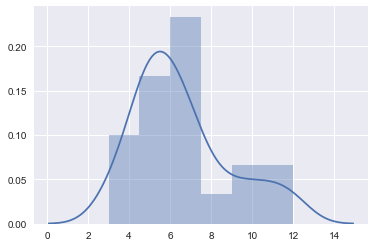

In [32]:
prob_dist()

From the above figure the probability estimates are clear for each simulation. X-axis represents the sum of two random integers and Y-axis the probability of that event occuring in number of simulations given(here 20).

2.2. Run your code for 1000 times. What is your estimation now?

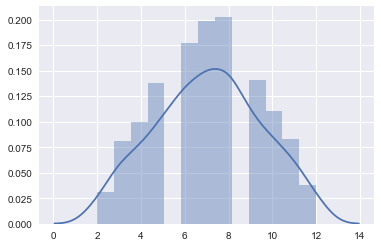

In [34]:
prob_dist(no_of_simulations = 1000)

From the above figure the probability estimates are clear for each simulation. X-axis represents the sum of two random integers and Y-axis the probability of that event occuring in number of simulations given(here 1000).

2.3. Change your program and assume that you have one fake die and one correct die. The fake die has 0 instead of 2. This means when you roll this defect die, a random number should be chosen among (1,0,3,4,5, and 6). Plot histogram of the values you have gathered in the vector. Calculate the probability of getting a 7 as the sum of the numbers appeared on the dice. What is the probability of getting 3?

We have modified function prob_dist() such that it considers a random variable from the list [0,1,3,4,5,6] for one die which is considered as fake. The other die is perfectly normal and considers an event from 1 to 6 integers.

In [40]:
def prob_dist_fake(no_of_simulations = 20):
    distribution = np.array([[]])
    runs = np.array([[]])
    for i in range(no_of_simulations):
        fake_die = rd.sample([0,1,3,4,5,6], 1)
        distribution = np.append(distribution, (fake_die[0]) + int(rd.randint(1,6)))
        runs = np.append(runs, int(i))
    prob_dist = sns.distplot(distribution)
    sns.despine(ax = prob_dist)

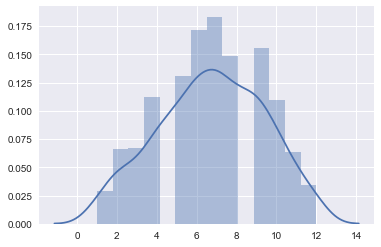

In [45]:
prob_dist_fake(no_of_simulations = 1000)

From the above figure we can see the probability of getting sum of 7 is the highest as seen in the above figure.

2.4. ** [Grad student only] ** Try the same problem with seven dice and plot the distribution together with a Gaussian fit. Report the mean and variance as calculated directly from the data as well as the fitted parameters.

In [3]:
def prob_dist_seven_dice(n = 20):
    distribution = np.array([[]])
    runs = np.array([[]])
    for i in range(n):
        distribution = np.append(distribution, int(rd.randint(1,6)) + 
                                 int(rd.randint(1,6)) + 
                                 int(rd.randint(1,6)) + 
                                 int(rd.randint(1,6)) + 
                                 int(rd.randint(1,6)) +
                                 int(rd.randint(1,6)) +
                                 int(rd.randint(1,6)))
        runs = np.append(runs, int(i))
    prob_dist = sns.distplot(distribution)
    sns.despine(ax = prob_dist)
    return(distribution, runs)

distribution, runs = prob_dist_seven_dice(n = 1000)

Mean and Variance from the plot.

From the above figure, we can easily identify that the mean of our Gaussian fit is 24 units (approx.) because the curve has its peak at that point. Also, the standard deviation is (middle value - lower limit or upper limit) / 3. To explain it further, we have middle value = 24 units (approx.) and the lower limit is 10 or the upper limit is 39. But we shall consider the lower limit here, hence the spread of the curve i.e., standard deviation is given by (24 - 10) / 3 = 4.66 units. We already know that variance = standard deviation^2. Hence, the variance is 21.77

Mean and Variance calculated from the data. 

In [8]:
print("The mean of the above gaussian fit is : ", np.mean(distribution))

The mean of the above gaussian fit is :  24.435


In [13]:
print("The variance of the above gaussian fit through calculation is : ", np.std(distribution))

The variance of the above gaussian fit through calculation is :  4.59627838582


Question 3: is in a separate pdf file named "ML_Assignment2.pdf" in the zip folder.

Reference for question 3:https://www.integral-calculator.com/